# Team One: The Opioid Crisis in the United States - Data Cleanup

###### Development team notes and caveats:
* Question 1: Data was extracted from https://wonder.cdc.gov/   Rather than extracting data in one large chunk and disassembling with code, I downloaded into individual tab separated text files. This was because I noticed some anomalies when extracting data from Wonder in large comingled batches; most likely due to the grouping functionality used by the Wonder tool. I found the raw data behind the Wonder site, but it was too large and required additional unknown software to read, for it to be useful in the time alloted for the project.
* Question 2:
* Question 3:
* Question 4:

#### Dependencies

In [64]:
import os                                                                    # os library

In [65]:
import numpy as np                                                           # numpy library

In [66]:
import pandas as pd                                                          # pandas library

In [67]:
import json                                                                  # json library

In [68]:
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm                                                 # for running regressions

#### Research Question 1: clean up raw data and export to csv or JSON for use by main notebook

In [69]:
filename = 'Q1DS1_Year.txt'                                                  # 1st raw data file
rawdata_file = os.path.join(".", "Data Files", "Question_1", filename)       # creates path to read data
q1ds1_df = pd.read_csv(rawdata_file, sep='\t')                               # reads data from file

In [70]:
q1ds1_df.head()                                                              # displays raw data

,Notes,Year,Year Code,Deaths,Population,Crude Rate
0,NaN,1999.0,1999.0,5594.0,279040168.0,2.0
1,NaN,2000.0,2000.0,6011.0,281421906.0,2.1
2,NaN,2001.0,2001.0,7088.0,284968955.0,2.5
3,NaN,2002.0,2002.0,9318.0,287625193.0,3.2
4,NaN,2003.0,2003.0,10389.0,290107933.0,3.6


In [71]:
q1ds1_df.drop('Notes', axis=1, inplace=True)                                 # drops Notes column
q1ds1_df.dropna(axis=0, how='any', inplace=True)                             # drops rows with NaN
q1ds1_df['Year'] = q1ds1_df['Year'].astype(int)                              # casts datatypes for columns
q1ds1_df['Year Code'] = q1ds1_df['Year Code'].astype(int)
q1ds1_df['Year Code'] = q1ds1_df['Year Code'].astype(str)
q1ds1_df['Deaths'] = q1ds1_df['Deaths'].astype(int)
q1ds1_df['Population'] = q1ds1_df['Population'].astype(int)

# Calculates death rate per 100,000 of population (Deaths / Population) * 100,000
q1ds1_df['Death Rate'] = q1ds1_df['Deaths'] /  q1ds1_df['Population'] * 100000
q1ds1_df.drop('Crude Rate', axis=1, inplace=True)                            # drops Crude Rate column
q1ds1_df.set_index('Year', inplace=True)                                     # reindexes by Year

In [72]:
q1ds1_df.head()                                                              # displays cleaned dataframe

,Year Code,Deaths,Population,Death Rate
Year,,,,
1999,1999,5594,279040168,2.004729
2000,2000,6011,281421906,2.135939
2001,2001,7088,284968955,2.487288
2002,2002,9318,287625193,3.239633
2003,2003,10389,290107933,3.581081


In [73]:
filename = 'Q1DS1.csv'                                                       # 1st cleaned data file
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to write data
q1ds1_df.to_csv(csv_file)                                                    # writes cleaned data to csv

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [74]:
filename = 'Q1DS2_Sanity.txt'                                                # 2nd raw data file
rawdata_file = os.path.join(".", "Data Files", "Question_1", filename)       # creates path to read data
q1ds2_df = pd.read_csv(rawdata_file, sep='\t')                               # reads data from file

In [75]:
q1ds2_df.head()                                                              # displays raw data

,Notes,Year,Year Code,Deaths,Population,Crude Rate
0,NaN,1999.0,1999.0,101.0,279040168.0,0.0
1,NaN,2000.0,2000.0,92.0,281421906.0,0.0
2,NaN,2001.0,2001.0,98.0,284968955.0,0.0
3,NaN,2002.0,2002.0,164.0,287625193.0,0.1
4,NaN,2003.0,2003.0,121.0,290107933.0,0.0


In [76]:
q1ds2_df.drop('Notes', axis=1, inplace=True)                                 # drops Notes column
q1ds2_df.dropna(axis=0, how='any', inplace=True)                             # drops rows with NaN
q1ds2_df['Year'] = q1ds2_df['Year'].astype(int)                              # casts datatypes for columns
q1ds2_df['Year Code'] = q1ds2_df['Year Code'].astype(int)
q1ds2_df['Year Code'] = q1ds2_df['Year Code'].astype(str)
q1ds2_df['Deaths'] = q1ds2_df['Deaths'].astype(int)
q1ds2_df['Population'] = q1ds2_df['Population'].astype(int)

# Calculates death rate per 100,000 of population (Deaths / Population) * 100,000
q1ds2_df['Death Rate'] = q1ds2_df['Deaths'] /  q1ds2_df['Population'] * 100000
q1ds2_df.drop('Crude Rate', axis=1, inplace=True)                            # drops Crude Rate column
q1ds2_df.set_index('Year', inplace=True)                                     # reindexes by Year

In [77]:
q1ds2_df.head()                                                              # displays cleaned dataframe

,Year Code,Deaths,Population,Death Rate
Year,,,,
1999,1999,101,279040168,0.036196
2000,2000,92,281421906,0.032691
2001,2001,98,284968955,0.034390
2002,2002,164,287625193,0.057019
2003,2003,121,290107933,0.041709


In [78]:
filename = 'Q1DS2.csv'                                                       # 2nd cleaned data file
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to write data
q1ds2_df.to_csv(csv_file)                                                    # writes cleaned data to csv

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [79]:
filename = 'Q1DS3_Gender.txt'                                                # 3rd raw data file
rawdata_file = os.path.join(".", "Data Files", "Question_1", filename)       # creates path to read data
q1ds3_df = pd.read_csv(rawdata_file, sep='\t')                               # reads data from file

In [80]:
q1ds3_df.head()                                                              # displays raw data

,Notes,Gender,Gender Code,Deaths,Population,Crude Rate,Age Adjusted Rate
0,NaN,Female,F,109681.0,2.763844e+09,4.0,4.0
1,NaN,Male,M,204081.0,2.671903e+09,7.6,7.6
2,Total,NaN,NaN,313762.0,5.435746e+09,5.8,5.8
3,---,NaN,NaN,NaN,NaN,NaN,NaN
4,"Dataset: Multiple Cause of Death, 1999-2016",NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
q1ds3_df.drop('Notes', axis=1, inplace=True)                                 # drops Notes column
q1ds3_df.dropna(axis=0, how='any', inplace=True)                             # drops rows with NaN
q1ds3_df['Deaths'] = q1ds3_df['Deaths'].astype(int)                          # casts datatypes for columns

# Calculates death rate per 100,000 of population (Deaths / Population) * 100,000
q1ds3_df['Death Rate'] = q1ds3_df['Deaths'] /  q1ds3_df['Population'] * 100000
q1ds3_df.drop('Crude Rate', axis=1, inplace=True)                            # drops Crude Rate column
q1ds3_df.drop('Age Adjusted Rate', axis=1, inplace=True)                     # drops Age Adj rate column

In [82]:
q1ds3_df.head()                                                              # displays cleaned dataframe

,Gender,Gender Code,Deaths,Population,Death Rate
0,Female,F,109681,2.763844e+09,3.968422
1,Male,M,204081,2.671903e+09,7.638041


In [83]:
filename = 'Q1DS3.csv'                                                       # 3rd cleaned data file
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to write data
q1ds3_df.to_csv(csv_file)                                                    # writes cleaned data to csv

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [84]:
filename = 'Q1DS4_Age.txt'                                                   # 4th raw data file
rawdata_file = os.path.join(".", "Data Files", "Question_1", filename)       # creates path to read data
q1ds4_df = pd.read_csv(rawdata_file, sep='\t')                               # reads data from file

In [85]:
q1ds4_df.head()                                                              # displays raw data

,Notes,Ten-Year Age Groups,Ten-Year Age Groups Code,Deaths,Population,Crude Rate
0,NaN,< 1 year,1,158.0,71608191,0.2
1,NaN,1-4 years,1-4,425.0,285248834,0.1
2,NaN,5-14 years,5-14,436.0,737079143,0.1
3,NaN,15-24 years,15-24,32545.0,764330433,4.3
4,NaN,25-34 years,25-34,71071.0,737039056,9.6


In [86]:
q1ds4_df.drop('Notes', axis=1, inplace=True)                                 # drops Notes column
q1ds4_df.dropna(axis=0, how='any', inplace=True)                             # drops rows with NaN
q1ds4_df.drop(q1ds4_df.index[-1], inplace=True)                              # drops age not stated row
q1ds4_df['Deaths'] = q1ds4_df['Deaths'].astype(int)                          # casts datatypes for columns
q1ds4_df['Population'] = q1ds4_df['Population'].astype(int)

# Calculates death rate per 100,000 of population (Deaths / Population) * 100,000
q1ds4_df['Death Rate'] = q1ds4_df['Deaths'] /  q1ds4_df['Population'] * 100000
q1ds4_df.drop('Crude Rate', axis=1, inplace=True)                            # drops Crude Rate column

In [87]:
q1ds4_df.head()                                                              # displays cleaned dataframe

,Ten-Year Age Groups,Ten-Year Age Groups Code,Deaths,Population,Death Rate
0,< 1 year,1,158,71608191,0.220645
1,1-4 years,1-4,425,285248834,0.148993
2,5-14 years,5-14,436,737079143,0.059152
3,15-24 years,15-24,32545,764330433,4.257975
4,25-34 years,25-34,71071,737039056,9.642773


In [88]:
filename = 'Q1DS4.csv'                                                       # 4th cleaned data file
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to write data
q1ds4_df.to_csv(csv_file)                                                    # writes cleaned data to csv

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [89]:
filename = 'Q1DS5_Race.txt'                                                  # 5th raw data file
rawdata_file = os.path.join(".", "Data Files", "Question_1", filename)       # creates path to read data
q1ds5_df = pd.read_csv(rawdata_file, sep='\t')                               # reads data from file

In [90]:
q1ds5_df.head()                                                              # displays raw data

,Notes,Race,Race Code,Deaths,Population,Crude Rate,Age Adjusted Rate
0,NaN,American Indian or Alaska Native,1002-5,3578.0,6.924957e+07,5.2,5.4
1,NaN,Asian or Pacific Islander,A-PI,1986.0,2.848739e+08,0.7,0.6
2,NaN,Black or African American,2054-5,24111.0,7.331076e+08,3.3,3.4
3,NaN,White,2106-3,284087.0,4.348515e+09,6.5,6.6
4,Total,NaN,NaN,313762.0,5.435746e+09,5.8,5.8


In [91]:
q1ds5_df.drop('Notes', axis=1, inplace=True)                                 # drops Notes column
q1ds5_df.dropna(axis=0, how='any', inplace=True)                             # drops rows with NaN
q1ds5_df['Deaths'] = q1ds5_df['Deaths'].astype(int)                          # casts datatypes for columns

# Calculates death rate per 100,000 of population (Deaths / Population) * 100,000
q1ds5_df['Death Rate'] = q1ds5_df['Deaths'] /  q1ds5_df['Population'] * 100000
q1ds5_df.drop('Crude Rate', axis=1, inplace=True)                            # drops Crude Rate column
q1ds5_df.drop('Age Adjusted Rate', axis=1, inplace=True)                     # drops Age Adj rate column
q1ds5_df.sort_values(by=['Death Rate'], ascending=False, inplace=True)       # sorts data (descending)

In [92]:
q1ds5_df.head()                                                              # displays cleaned dataframe

,Race,Race Code,Deaths,Population,Death Rate
3,White,2106-3,284087,4.348515e+09,6.532965
0,American Indian or Alaska Native,1002-5,3578,6.924957e+07,5.166819
2,Black or African American,2054-5,24111,7.331076e+08,3.288876
1,Asian or Pacific Islander,A-PI,1986,2.848739e+08,0.697151


In [93]:
filename = 'Q1DS5.csv'                                                       # 5th cleaned data file
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to write data
q1ds5_df.to_csv(csv_file)                                                    # writes cleaned data to csv

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [94]:
filename = 'Q1DS6_County.txt'                                                # 6th raw data file
rawdata_file = os.path.join(".", "Data Files", "Question_1", filename)       # creates path to read data
q1ds6_df = pd.read_csv(rawdata_file, sep='\t')                               # reads data from file

In [95]:
q1ds6_df.head()                                                              # displays raw data

,Notes,County,County Code,Deaths,Population,Crude Rate
0,NaN,"Baldwin County, AL",1003.0,185.0,3104213.0,6.0
1,NaN,"Bibb County, AL",1007.0,12.0,397480.0,Unreliable
2,NaN,"Blount County, AL",1009.0,44.0,997776.0,4.4
3,NaN,"Calhoun County, AL",1015.0,12.0,2074478.0,Unreliable
4,NaN,"Cherokee County, AL",1019.0,13.0,455087.0,Unreliable


In [96]:
q1ds6_df.drop('Notes', axis=1, inplace=True)                                 # drops Notes column
q1ds6_df.dropna(axis=0, how='any', inplace=True)                             # drops rows with NaN
q1ds6_df['Deaths'] = q1ds6_df['Deaths'].astype(int)                          # casts datatypes for columns
q1ds6_df['Population'] = q1ds6_df['Population'].astype(int)
q1ds6_df['County Code'] = q1ds6_df['County Code'].astype(int)
q1ds6_df['County Code'] = q1ds6_df['County Code'].astype(str)

# Calculates death rate per 100,000 of population (Deaths / Population) * 100,000
q1ds6_df['Death Rate'] = q1ds6_df['Deaths'] /  q1ds6_df['Population'] * 100000
q1ds6_df.drop('Crude Rate', axis=1, inplace=True)                            # drops Crude Rate column

In [97]:
q1ds6_df.head()                                                              # displays cleaned dataframe

,County,County Code,Deaths,Population,Death Rate
0,"Baldwin County, AL",1003,185,3104213,5.959643
1,"Bibb County, AL",1007,12,397480,3.019020
2,"Blount County, AL",1009,44,997776,4.409807
3,"Calhoun County, AL",1015,12,2074478,0.578459
4,"Cherokee County, AL",1019,13,455087,2.856597


In [98]:
filename = 'Q1DS6.csv'                                                       # 6th cleaned data file
csv_file = os.path.join(".", "Data Files", "Question_1", filename)           # creates path to write data
q1ds6_df.to_csv(csv_file)                                                    # writes cleaned data to csv

In [99]:
q1ds6_df.drop('County', axis=1, inplace=True)                                # drops unneeded columns
q1ds6_df.drop('Deaths', axis=1, inplace=True)                                 
q1ds6_df.drop('Population', axis=1, inplace=True)
q1ds6_df.set_index('County Code', inplace=True)                              # reindexes by County Code

In [100]:
q1ds6_df['Rate Bin'] = float(1)                                              # add new column to dataframe
q1ds6_df.loc[q1ds6_df['Death Rate'] > 3, 'Rate Bin'] = float(2)              # assigns bin values to death rates by range
q1ds6_df.loc[q1ds6_df['Death Rate'] > 6, 'Rate Bin'] = float(3)
q1ds6_df.loc[q1ds6_df['Death Rate'] > 9, 'Rate Bin'] = float(4)
q1ds6_df.loc[q1ds6_df['Death Rate'] > 12, 'Rate Bin'] = float(5)
q1ds6_df.drop('Death Rate', axis=1, inplace=True)                            # drops unneeded column

In [101]:
q1ds6_df.head()                                                              # displays cleaned JSON data

,Rate Bin
County Code,
1003,2.0
1007,2.0
1009,2.0
1015,1.0
1019,1.0


In [102]:
json_dict = {}                                                               # initializes empty dict 

for index, row in q1ds6_df.iterrows():                                       # iterates through dataframe
    if index not in json_dict:                                               # checks for duplicates...
        json_dict[index] = row[0]                                            # adds data to dictionary

In [103]:
filename = 'Q1DS6.json'                                                      # 6th cleaned json data file
json_file = os.path.join(".", "Data Files", "Question_1", filename)          # creates path to write data

with open(json_file, "w") as f:                                              # opens file in write mode
    f.write(json.dumps(json_dict))                                           # writes json data to file 

#### Research Question 2: clean up raw data and export

#### Research Question 3: clean up raw data and export

In [104]:

# import datasets
csv_OpDeaths = r'Data Files/raw_data-KFF_opioid_death_csv.csv' 
csv_UrbPop = r'Data Files/pop-urban-pct-historical_cleaned_up.csv'

# Read in the csv files, skipping titles and footer notes
OpDeaths_df = pd.read_csv(csv_OpDeaths, engine='python', skiprows=[0, 1], skipfooter=13) 
UrbPop_df = pd.read_csv(csv_UrbPop, engine='python', skipfooter=7)


# change NSD and NR into NaN
OpDeaths_df = OpDeaths_df.replace(['NSD', 'NR'], np.nan)

OpDeaths_df.tail()



,Location,1999__Opioid Overdose Death Rate (Age-Adjusted),2000__Opioid Overdose Death Rate (Age-Adjusted),2001__Opioid Overdose Death Rate (Age-Adjusted),2002__Opioid Overdose Death Rate (Age-Adjusted),2003__Opioid Overdose Death Rate (Age-Adjusted),2004__Opioid Overdose Death Rate (Age-Adjusted),2005__Opioid Overdose Death Rate (Age-Adjusted),2006__Opioid Overdose Death Rate (Age-Adjusted),2007__Opioid Overdose Death Rate (Age-Adjusted),2008__Opioid Overdose Death Rate (Age-Adjusted),2009__Opioid Overdose Death Rate (Age-Adjusted),2010__Opioid Overdose Death Rate (Age-Adjusted),2011__Opioid Overdose Death Rate (Age-Adjusted),2012__Opioid Overdose Death Rate (Age-Adjusted),2013__Opioid Overdose Death Rate (Age-Adjusted),2014__Opioid Overdose Death Rate (Age-Adjusted),2015__Opioid Overdose Death Rate (Age-Adjusted)
47,Virginia,2.7,3.4,4.2,4.7,4.8,5.1,4.7,5.3,6.4,6.2,5.9,4.8,7.1,6.5,7.6,9.1,9.9
48,Washington,5.9,5.8,5.3,7.4,7.5,9,9.2,10,9.7,10.1,10.2,8.9,9.9,9.7,8.9,9.2,9.3
49,West Virginia,1.8,2.8,7.9,10.1,11.2,14.2,8.2,16.1,19,21.0,10.3,25.6,31.5,27.1,27.9,31.6,36.0
50,Wisconsin,1.6,2.1,2.6,3.2,3.7,4,4.9,6,6.7,6.6,6.9,7.3,8.3,8.6,10.6,11.1,11.2
51,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,7.6,5.7,8.5,7.5,7.7,8.6,9.3,7.9


In [105]:
# preparing UrbPop_df for merging and making sure there are 52 entries (50 states + DC + US overall)
UrbPop_df = UrbPop_df.rename(columns={'Area Name':'Location'}) 
UrbPop_df.head()

,FIPS,Location,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
0,0,United States,39.6,45.6,51.2,56.1,56.5,64.0,69.9,73.6,73.7,75.2,79.0,80.7
1,1,Alabama,11.9,17.3,21.7,28.1,30.2,43.8,54.8,58.6,60.0,60.4,55.4,59.0
2,2,Alaska,24.5,9.5,5.6,13.2,24.0,26.6,37.9,56.9,64.3,67.5,65.6,66.0
3,4,Arizona,15.9,31.0,36.1,34.4,34.8,55.5,74.5,79.6,83.8,87.5,88.2,89.8
4,5,Arkansas,8.5,12.9,16.6,20.6,22.2,33.0,42.8,50.0,51.6,53.5,52.5,56.2


In [106]:
# merging UrbPop_df and OpDeaths_df. This ensures that the data matches for each state. 
OpDeaths_Urb_df = pd.merge(OpDeaths_df, UrbPop_df, on='Location')
OpDeaths_Urb_df = OpDeaths_Urb_df.drop(OpDeaths_Urb_df.index[0]) #dropping US total
OpDeaths_Urb_df.head()

,Location,1999__Opioid Overdose Death Rate (Age-Adjusted),2000__Opioid Overdose Death Rate (Age-Adjusted),2001__Opioid Overdose Death Rate (Age-Adjusted),2002__Opioid Overdose Death Rate (Age-Adjusted),2003__Opioid Overdose Death Rate (Age-Adjusted),2004__Opioid Overdose Death Rate (Age-Adjusted),2005__Opioid Overdose Death Rate (Age-Adjusted),2006__Opioid Overdose Death Rate (Age-Adjusted),2007__Opioid Overdose Death Rate (Age-Adjusted),...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
1,Alabama,0.8,1,1.3,1.6,1.1,1.8,1.8,2.7,3.6,...,21.7,28.1,30.2,43.8,54.8,58.6,60.0,60.4,55.4,59.0
2,Alaska,4,4,NaN,NaN,NaN,NaN,NaN,4.1,NaN,...,5.6,13.2,24.0,26.6,37.9,56.9,64.3,67.5,65.6,66.0
3,Arizona,4.7,4.8,5.2,6.2,6.4,6.3,6.6,7.8,7.7,...,36.1,34.4,34.8,55.5,74.5,79.6,83.8,87.5,88.2,89.8
4,Arkansas,1.1,0.8,1.1,3.5,3.4,4.8,4.6,5.1,5.4,...,16.6,20.6,22.2,33.0,42.8,50.0,51.6,53.5,52.5,56.2
5,California,4.5,3,1.6,4.2,4,4,3.8,4.1,4.5,...,67.9,73.3,71.0,80.7,86.4,90.9,91.3,92.6,94.4,95.0


In [107]:
# exporting cleaned up OpDeaths to csv

filename = 'OpiodDeathsUrbanPop.csv'                                                  
csv_file = os.path.join(".", "Data Files", "Question_3", filename)           
OpDeaths_Urb_df.to_csv(csv_file) 

In [108]:
# dfs for the years 2000 and 2010 (the years where census data is available):
# df Opioid deaths 2000
OpDeathsDelta_df = pd.DataFrame(\
                          data = OpDeaths_Urb_df,\
                          columns=['Location', '2000__Opioid Overdose Death Rate (Age-Adjusted)',\
                                   '2010__Opioid Overdose Death Rate (Age-Adjusted)', '2010'])
OpDeathsDelta_df = OpDeathsDelta_df.dropna()

# Opioid Death rate is not numeric. Change to numeric so scatter plot works 
OpDeathsDelta_df['2000__Opioid Overdose Death Rate (Age-Adjusted)']=\
    OpDeathsDelta_df['2000__Opioid Overdose Death Rate (Age-Adjusted)'].apply(pd.to_numeric)
OpDeathsDelta_df['2010__Opioid Overdose Death Rate (Age-Adjusted)']=\
    OpDeathsDelta_df['2010__Opioid Overdose Death Rate (Age-Adjusted)'].apply(pd.to_numeric)

# get change in death rate from 2000 to 2010 
OpDeathsDelta_df['Change in Death'] = OpDeathsDelta_df['2010__Opioid Overdose Death Rate (Age-Adjusted)']\
    - OpDeathsDelta_df['2000__Opioid Overdose Death Rate (Age-Adjusted)']

OpDeathsDelta_df.tail()

,Location,2000__Opioid Overdose Death Rate (Age-Adjusted),2010__Opioid Overdose Death Rate (Age-Adjusted),2010,Change in Death
46,Vermont,3.6,6.8,38.9,3.2
47,Virginia,3.4,4.8,75.5,1.4
48,Washington,5.8,8.9,84.1,3.1
49,West Virginia,2.8,25.6,48.7,22.8
50,Wisconsin,2.1,7.3,70.2,5.2


In [109]:
# save OpDeathsDelta_df as csv file 

filename = 'ChangeOpiodDeaths(00-10).csv'                                                  
csv_file = os.path.join(".", "Data Files", "Question_3", filename)           
OpDeathsDelta_df.to_csv(csv_file) 

#### -Crime and Opioids

In [110]:
#importing crime data
csv_violent1999 = "Data Files\ViolentCrimeState1999.csv"
csv_violent2014 = r'Data Files\ViolentCrimeState2014.csv'
csv_property1999 = 'Data Files\PropertyCrimeState1999.csv'
csv_property2014 = r'Data Files\PropertyCrimeStates2014.csv'

# Read in the csv files, skipping titles (skipfooter isn't working for some reason)
violent1999_df = pd.read_csv(csv_violent1999, skiprows=9)
violent2014_df = pd.read_csv(csv_violent2014, skiprows=9)
property1999_df = pd.read_csv(csv_property1999, skiprows=9)
property2014_df = pd.read_csv(csv_property2014, skiprows=9)

#clean up footers or any row with 4 null values. Also adds year as suffix to distinguish values when merge later
violent1999_df = violent1999_df.dropna(thresh=4).add_suffix('_1999')
violent2014_df = violent2014_df.dropna(thresh=4).add_suffix('_2014')
property1999_df = property1999_df.dropna(thresh=4).add_suffix('_1999')
property2014_df = property2014_df.dropna(thresh=4).add_suffix('_2014')

#removes year from State column 
violent1999_df = violent1999_df.rename(columns={'State_1999':'State'})
violent2014_df = violent2014_df.rename(columns={'State_2014':'State'})
property1999_df = property1999_df.rename(columns={'State_1999':'State'})
property2014_df = property2014_df.rename(columns={'State_2014':'State'})

# change values as numeric
violent1999_df = violent1999_df.apply(pd.to_numeric, errors='ignore')  
violent2014_df = violent2014_df.apply(pd.to_numeric, errors='ignore')  
property1999_df = property1999_df.apply(pd.to_numeric, errors='ignore')
property2014_df = property2014_df.apply(pd.to_numeric, errors='ignore')

#drop US total value
violent1999_df = violent1999_df[:-1] #US total is at the last row for each of the crime df
violent2014_df = violent2014_df[:-1]
property1999_df = property1999_df[:-1]
property2014_df = property2014_df[:-1]

property2014_df.tail()

FileNotFoundError: File b'Data Files\\ViolentCrimeState1999.csv' does not exist

In [111]:
# Crime dataframes for each crime type
violent_df = violent1999_df.merge(violent2014_df, on='State')
property_df = property1999_df.merge(property2014_df, on='State')

# get change in violent crimes, as well as change in robbery rates 
violent_df['Violent Crime rate_change'] = violent_df['Violent Crime rate_2014'] - violent_df['Violent Crime rate_1999']
violent_df['Robbery rate_change'] = violent_df['Robbery rate_2014'] - violent_df['Robbery rate_1999']

#get change in property crime rates
property_df['Property crime rate_change'] = property_df['Property crime rate_2014']\
                                            - property_df['Property crime rate_1999']

violent_df.tail()

NameError: name 'violent1999_df' is not defined

In [112]:
# get df of both types of crime 1999-2014
crime_df = pd.merge(violent_df, property_df, on='State')

crime_df.head()

NameError: name 'violent_df' is not defined

In [113]:
# export crime_df as csv to Data Files

filename = 'crime_df.csv'
csv_file = os.path.join(".", "Data Files", "Question_3", filename)           
crime_df.to_csv(csv_file)

NameError: name 'crime_df' is not defined

#### -Extra: Mental health and opioids: is the opioid epidemic really a mental health crisis?

In [114]:
# get mental health spending data by state
csv = r'Data Files/KFF_MentalHealthSpendState.csv'

MHealthSpend_df = pd.read_csv(csv, skiprows=2, skipfooter=22)

MHealthSpend_df.tail()

/Users/jmarinelli/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


,Location,FY2004__SMHA Expenditures Per Capita,FY2005__SMHA Expenditures Per Capita,FY2006__SMHA Expenditures Per Capita,FY2007__SMHA Expenditures Per Capita,FY2008__SMHA Expenditures Per Capita,FY2009__SMHA Expenditures Per Capita,FY2010__SMHA Expenditures Per Capita,FY2011__SMHA Expenditures Per Capita,FY2012__SMHA Expenditures Per Capita,FY2013__SMHA Expenditures Per Capita,Footnotes
48,Washington,93.60,93.96,98.83,106.29,116.06,115.23,113.57,110.92,112.98,113.67,None
49,West Virginia,59.80,65.56,71.49,73.66,79.16,76.45,72.88,82.71,83.87,94.44,"1, 2, 3"
50,Wisconsin,94.82,104.90,107.81,104.69,104.72,121.45,108.15,105.97,102.90,113.05,2
51,Wyoming,102.44,98.79,88.61,99.55,142.46,154.65,133.24,115.85,111.48,118.8,1
52,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,22.97,23.54,23.33,19.02,1


In [115]:
#merge mental health spending with opioid deaths by location
OpDeaths_df.replace(['NSD', 'NR'], np.nan)

DeathMental_df = OpDeaths_df.merge(MHealthSpend_df, how='inner', on='Location')
DeathMental_df = DeathMental_df.replace(['NSD', 'NR'], np.nan)

# to numeric
DeathMental_df['FY2013__SMHA Expenditures Per Capita'] = \
DeathMental_df['FY2013__SMHA Expenditures Per Capita'].apply(pd.to_numeric)
DeathMental_df['2013__Opioid Overdose Death Rate (Age-Adjusted)'] =\
DeathMental_df['2013__Opioid Overdose Death Rate (Age-Adjusted)'].apply(pd.to_numeric)

DeathMental_df = DeathMental_df.dropna(subset = ['FY2013__SMHA Expenditures Per Capita', '2013__Opioid Overdose Death Rate (Age-Adjusted)'])


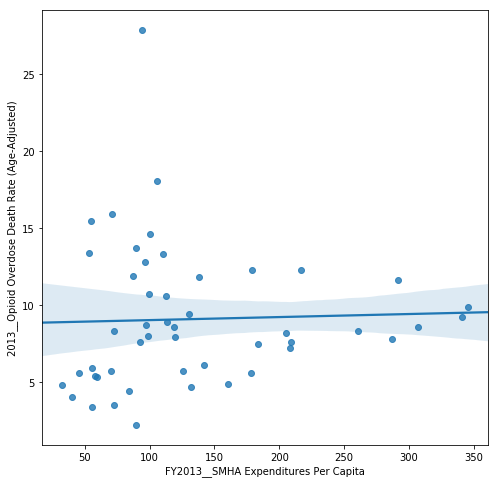

In [116]:

plt.figure(figsize=(8,8))
sns.regplot(x=DeathMental_df['FY2013__SMHA Expenditures Per Capita'],\
                           y=DeathMental_df['2013__Opioid Overdose Death Rate (Age-Adjusted)'])
plt.show()

In [117]:
# regression of 2013 opioid overdose deaths on 2013 state mental health agency expenditure per capita

y=DeathMental_df['2013__Opioid Overdose Death Rate (Age-Adjusted)']
x=DeathMental_df['FY2013__SMHA Expenditures Per Capita']
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                          
===========================================================================================================
Dep. Variable:     2013__Opioid Overdose Death Rate (Age-Adjusted)   R-squared:                       0.001
Model:                                                         OLS   Adj. R-squared:                 -0.020
Method:                                              Least Squares   F-statistic:                   0.05751
Date:                                             Fri, 05 Jan 2018   Prob (F-statistic):              0.812
Time:                                                     22:51:12   Log-Likelihood:                -143.34
No. Observations:                                               49   AIC:                             290.7
Df Residuals:                                                   47   BIC:                             294.5
Df Model:                                                        1                                         
Covariance Type:                                         nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    8.8255      1.276      6.915      0.000       6.258      11.393
FY2013__SMHA Expenditures Per Capita     0.0020      0.008      0.240      0.812      -0.015       0.019
==============================================================================
Omnibus:                       27.855   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.157
Skew:                           1.622   Prob(JB):                     1.43e-13
Kurtosis:                       7.296   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Extra #2: Rural vs. Urban crime

In [118]:
# opioid deaths and % urban by state. If state urban population in 2010 is >=75%, it is considered urban.  
    # dummy variables: urban state == 1, otherwise == 0
OpDeathsDelta_df['urban'] = np.where(OpDeathsDelta_df['2010']>=75, 1, 0)

OpDeathsDelta_df.head()

,Location,2000__Opioid Overdose Death Rate (Age-Adjusted),2010__Opioid Overdose Death Rate (Age-Adjusted),2010,Change in Death,urban
1,Alabama,1.0,4.1,59.0,3.1,0
2,Alaska,4.0,8.7,66.0,4.7,0
3,Arizona,4.8,9.9,89.8,5.1,1
4,Arkansas,0.8,6.8,56.2,6.0,0
5,California,3.0,5.0,95.0,2.0,1


In [119]:
# merge urban dummy with crime data

# change location to state for merging purposes
OpDeathsDelta_df = OpDeathsDelta_df.rename(columns={'Location':'State'})
UCrime_df = crime_df.merge(OpDeathsDelta_df, on='State')

UCrime_df.tail()


NameError: name 'crime_df' is not defined

In [ ]:
# scatter plot of change in property crime rates and opioid deaths in 2014 
    #where urban == 0

RCrime_df = UCrime_df[UCrime_df['urban'] == 0]

plt.figure(figsize=(8,8))
sns.regplot(x=RCrime_df['2010__Opioid Overdose Death Rate (Age-Adjusted)'],\
                   y=RCrime_df['Property crime rate_change'])

plt.title('Change in Rural Property Crime Rates (1999-2014) and Opioid Deaths by State (2010)')
plt.show()

In [120]:
# scatter plot of change in property crime rates and opioid deaths in 2014 
    #where urban == 1

UrbCrime_df = UCrime_df[UCrime_df['urban'] == 1]

plt.figure(figsize=(8,8))
sns.regplot(x=UrbCrime_df['2010__Opioid Overdose Death Rate (Age-Adjusted)'],\
                   y=UrbCrime_df['Property crime rate_change'])

plt.title('Change in Rural Property Crime Rates (1999-2014) and Opioid Deaths by State (2010)')
plt.show()

NameError: name 'UCrime_df' is not defined

In [121]:
# multivar reg on 'Change in Rural Property Crime Rates (1999-2014) and Opioid Deaths by State (2010)'

y= UCrime_df['Property crime rate_change']
x= UCrime_df[['Change in Death', 'urban']]
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()

results.summary()

NameError: name 'UCrime_df' is not defined

#### Research Question 4: clean up raw data and export

In [122]:
# read NHE spending csv into DF
nhe = "Data Files/Question_4/NHE2016/NHE2016.csv"
nhe_df = pd.read_csv(nhe,header = 1, thousands=',',engine='python')

nhe_df.head()

,Expenditure Amount (Millions),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Total National Health Expenditures,27214,29138,31842,34595,38394,41852,46081,51565,58402,...,2295307,2399121,2495414,2598823,2689349,2797260,2879008,3026157,3200815,3337248
1,Out of pocket,12949,13357,14255,15311,16928,18209,18594,18537,20500,...,290000,295184,293723,299742,309973,318330,325189,330068,339315,352537
2,Health Insurance,7497,8236,8999,9892,10971,12023,15673,21109,24379,...,1609250,1695968,1796424,1876922,1950187,2022904,2087804,2228136,2382770,2486842
3,Private Health Insurance,5812,6468,7178,7952,9052,10072,10296,10452,11830,...,776176,802857,832906,864344,898631,928211,946398,999940,1068778,1123372
4,Medicare,-,-,-,-,-,-,1842,4924,6218,...,432751,466971,498859,519787,544679,569634,590163,618889,648808,672093


In [123]:
# extract Total NHE and Total CMS Program rows
nhe_cms_df = nhe_df.loc[[0,35,36],]
nhe_cms_df = nhe_cms_df.set_index("Expenditure Amount (Millions)")

# set to numeric for plotting purposes
nhe_cms_df = nhe_cms_df.apply(pd.to_numeric, errors='ignore')

nhe_cms_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Expenditure Amount (Millions),,,,,,,,,,,,,,,,,,,,,
Total National Health Expenditures,27214,29138,31842,34595,38394,41852,46081,51565,58402,65923,...,2295307,2399121,2495414,2598823,2689349,2797260,2879008,3026157,3200815,3337248
"Total CMS Programs (Medicaid, CHIP and Medicare)",-,-,-,-,-,-,3146,8065,9759,11220,...,767613,821394,884386,928553,963412,1004951,1049032,1128749,1207734,1254525
POPULATION,186,189,192,195,197,200,202,204,206,208,...,301,304,306,309,311,313,316,318,320,322


In [124]:
# extract Total NHE and Total CMS Program rows
nhe_cms_df = nhe_df.loc[[0,35,36],]
nhe_cms_df = nhe_cms_df.set_index("Expenditure Amount (Millions)")

# set to numeric for plotting purposes
nhe_cms_df = nhe_cms_df.apply(pd.to_numeric, errors='ignore')

nhe_cms_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Expenditure Amount (Millions),,,,,,,,,,,,,,,,,,,,,
Total National Health Expenditures,27214,29138,31842,34595,38394,41852,46081,51565,58402,65923,...,2295307,2399121,2495414,2598823,2689349,2797260,2879008,3026157,3200815,3337248
"Total CMS Programs (Medicaid, CHIP and Medicare)",-,-,-,-,-,-,3146,8065,9759,11220,...,767613,821394,884386,928553,963412,1004951,1049032,1128749,1207734,1254525
POPULATION,186,189,192,195,197,200,202,204,206,208,...,301,304,306,309,311,313,316,318,320,322


In [130]:
# write cleaned df into csv
filename = 'Q4DS1.csv'                                                       # 1st cleaned data file
csv_file = os.path.join(".", "Data Files", "Question_4", filename)           # creates path to write data
nhe_cms_df.to_csv(csv_file)   